# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit,
answer the following questions:

In [ ]:
!pip install turicreate

In [ ]:
!pip install networkx
!pip install python-igraph

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/
!mkdir ./datasets/kings_of_leon
!wget http://dynamics.cs.washington.edu/nobackup/reddit/kings_of_leon.tar.gz -O ./datasets/kings_of_leon/kings_of_leon.tar.gz
!tar -xf ./datasets/kings_of_leon/kings_of_leon.tar.gz -C ./datasets/kings_of_leon/
!ls ./datasets/kings_of_leon/

mkdir: cannot create directory ‘./datasets/’: File exists
mkdir: cannot create directory ‘./datasets/kings_of_leon’: File exists
--2022-04-25 16:51:43--  http://dynamics.cs.washington.edu/nobackup/reddit/kings_of_leon.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1045245 (1021K) [application/x-gzip]
Saving to: ‘./datasets/kings_of_leon/kings_of_leon.tar.gz’

./datasets/kings_of 100%[===================>]   1021K  3.60MB/s    in 0.3s    

2022-04-25 16:51:43 (3.60 MB/s) - ‘./datasets/kings_of_leon/kings_of_leon.tar.gz’ saved [1045245/1045245]

kings_of_leon.2013-01-04.2013-02-01.sgraph
kings_of_leon.2013-01-04.2013-03-01.sgraph
kings_of_leon.2013-01-04.2013-03-29.sgraph
kings_of_leon.2013-01-04.2013-04-26.sgraph
kings_of_leon.2013-01-04.2013-05-24.sgraph
kings_of_leon

In [ ]:
import turicreate as tc
import networkx as nx
import igraph
import matplotlib.pyplot as plt
%matplotlib inline

v_sf = tc.load_sframe("./datasets/kings_of_leon/kings_of_leon.vertices.timeseries/m_e7d15e55e076176d/m_d70f17285e8a5be.frame_idx")
v_sf

mindate,v_id,maxdate
2013-01-04 22:02:30,CBERT117,2013-01-04 22:02:30
2013-01-07 23:39:23,KoLeon67,2013-01-16 03:22:05
2013-01-09 22:46:49,jabobadilla,2016-09-14 04:40:31
2013-01-12 17:34:51,dougli32,2013-01-12 17:34:51
2013-01-31 01:39:55,wantingnowyou,2013-01-31 01:39:55
2013-06-22 21:06:24,Paddytee,2016-10-21 21:32:00
2013-07-10 14:02:02,CrumpledForeskin,2014-06-05 03:22:48
2013-07-11 00:38:20,SamboaTheDoorMan,2016-04-07 17:30:56
2013-07-12 09:45:59,Pablol,2013-07-19 10:05:31
2013-07-17 11:57:52,ha_classic,2014-02-25 05:46:43


In [ ]:
l_sf = tc.load_sframe("./datasets/kings_of_leon/kings_of_leon.interactions.timeseries/m_b64cfba773d73d05/m_f592bcd40aa7dd83.frame_idx")
l_sf

datetime,src_id,dst_id
2013-01-12 17:34:51,dougli32,CBERT117
2013-06-23 01:22:41,jabobadilla,Paddytee
2013-07-10 22:11:49,jabobadilla,CrumpledForeskin
2013-07-10 23:45:53,jabobadilla,Paddytee
2013-07-12 19:05:21,CrumpledForeskin,Pablol
2013-07-14 05:03:48,jabobadilla,CrumpledForeskin
2013-07-15 13:03:45,CrumpledForeskin,jabobadilla
2013-07-18 14:47:06,jabobadilla,True_to_you
2013-07-18 15:13:01,jabobadilla,SamboaTheDoorMan
2013-07-18 17:00:25,jabobadilla,adam4543


**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
sg = tc.SGraph(vertices=v_sf, edges=l_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")
raw_sg = tc.SGraph(vertices=v_sf, edges=l_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")
sg.summary()

{'num_edges': 462, 'num_vertices': 285}

In [ ]:
degree = tc.degree_counting.create(sg)
degree['graph']

SGraph({'num_edges': 462, 'num_vertices': 285})
Vertex Fields:['__id', 'in_degree', 'out_degree', 'total_degree']
Edge Fields:['__src_id', '__dst_id']

In [ ]:
# Addding in,out, and total degree to the vertices attributes
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
sg.vertices.sort("total_degree", ascending=False)

__id,mindate,maxdate,total_degree,in_degree,out_degree
jabobadilla,2013-01-09 22:46:49,2016-09-14 04:40:31,95,37,58
toekneebalogna,2013-09-25 00:19:12,2016-10-28 22:31:08,57,23,34
JustinGitelmanMusic,2016-09-10 23:50:15,2016-10-24 23:01:17,42,20,22
batmanforhire,2016-09-09 19:02:12,2016-10-27 21:37:22,33,16,17
MrBratton,2015-10-22 15:46:00,2016-10-31 13:38:17,25,10,15
the_rippers,2014-02-25 14:47:54,2016-10-18 15:01:22,25,15,10
Jackslat,2014-02-26 02:00:24,2016-10-01 00:32:27,22,8,14
True_to_you,2013-07-18 12:47:17,2016-04-08 09:02:38,15,8,7
diablo244,2016-08-12 00:53:22,2016-10-16 13:28:53,14,7,7
CrumpledForeskin,2013-07-10 14:02:02,2014-06-05 03:22:48,14,7,7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


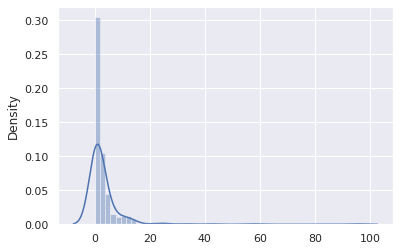

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.distplot([v for v in sg.vertices['total_degree']])

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [ ]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(sg)
print("Networkx: %s" % nx.info(ng))

Networkx: DiGraph with 285 nodes and 347 edges


In [ ]:
import operator

#According to Closeness Centrality who is the most central:
d = nx.closeness_centrality(ng) # can take some time to run

max(dict(d).items(), key=operator.itemgetter(1))

('toekneebalogna', 0.15439075735552102)

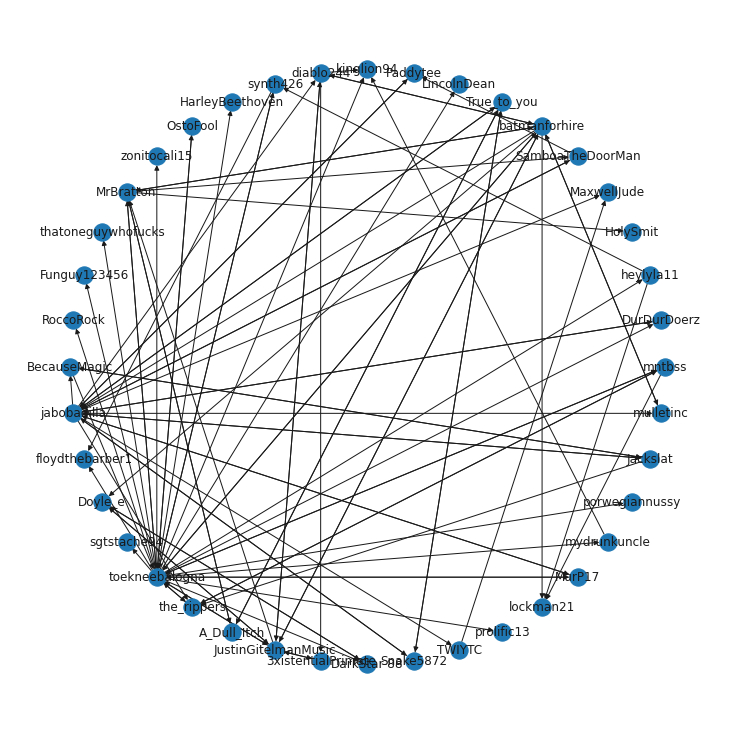

In [ ]:
sorted_d = sorted(d, key=d.get, reverse=True)[:40]

h = ng.subgraph(sorted_d)
plt.figure(figsize=(10,10))
nx.draw_circular(h, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
# PageRank
pr = tc.pagerank.create(sg)
pr

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 223.656               |

| 2         | 61.9369               |

| 3         | 26.9335               |

| 4         | 16.4921               |

| 5         | 9.10438               |

| 6         | 5.46655               |

| 7         | 3.46053               |

| 8         | 2.43725               |

| 9         | 1.7644                |

| 10        | 1.28686               |

| 11        | 0.950384              |

| 12        | 0.717566              |

| 13        | 0.543149              |

| 14        | 0.420529              |

| 15        | 0.322378              |

| 16        | 0.251484              |

| 17        | 0.194608              |

| 18        | 0.152658              |

| 19        | 0.119261              |

| 20        | 0.0941315             |

+-----------+-----------------------+

Class                                    : PagerankModel

Graph
-----
num_edges                                : 462
num_vertices                             : 285

Results
-------
graph                                    : SGraph. See m['graph']
vertex pagerank                          : SFrame. See m.pagerank
change in last iteration (L1 norm)       : 0.0941

Settings
--------
probability of random jumps to any node in the graph : 0.15
convergence threshold (L1 norm)          : 0.01
maximum number of iterations             : 20

Metrics
-------
training time (secs)                     : 1.463
number of iterations                     : 20

Queryable Fields
----------------
delta                                    : Change in pagerank for the last iteration in L1 norm
graph                                    : A new SGraph with the pagerank as a vertex property
max_iterations                           : The maximun number of iterations to run
num_iterations                           : 

In [ ]:
#  Triangles
triangle = tc.triangle_counting.create(sg)
triangle

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.128067 secs.

Total triangles in the graph : 63

Class                                    : TriangleCountingModel

Graph
-----
num_edges                                : 462
num_vertices                             : 285

Results
-------
graph                                    : SGraph. See m['graph']
total number of triangles                : 63
vertex triangle count                    : SFrame. See m.triangle_count

Metrics
-------
training time (secs)                     : 0.1387

Queryable Fields
----------------
graph                                    : A new SGraph with the triangle count as a vertex property.
num_triangles                            : Total number of triangles in the graph.
training_time                            : Total training time of the model
triangle_count                           : An SFrame with the triangle count for each vertex.

In [ ]:
# Average shortest path
short_dict = dict(nx.shortest_path_length(ng))
average_dict = {}
for key, value in short_dict.items():
  average_dict[key] = sum(value.values()) / len(value)

average_dict


{'3652015': 0.0,
 '3xistentialPrimate': 3.786764705882353,
 'AB_1996': 4.248175182481752,
 'ADizzy7': 3.9926470588235294,
 'AKM92': 4.294117647058823,
 'A_Dull_Itch': 3.5294117647058822,
 'AhoraMaz': 3.713235294117647,
 'Ajackson704': 4.639705882352941,
 'AndrewDARoberts': 0.0,
 'Apickledscotsman': 0.0,
 'ArcadeMGMTMouse': 0.0,
 'BEAR_RAMMAGE': 3.698529411764706,
 'Bababear43723': 3.0073529411764706,
 'Banannylle': 0.0,
 'BecauseMagic': 3.1838235294117645,
 'Benigans31': 0.0,
 'BryonWhite': 3.110294117647059,
 'CBERT117': 0.0,
 'Camper33': 0.0,
 'CannonEyes': 0.0,
 'ChadthedestroyerD': 0.0,
 'ClosetSloth': 4.678832116788321,
 'Cmaff15': 0.0,
 'Code16': 0.5,
 'Conveniently_So': 3.639705882352941,
 'Coppin-it-washin-it': 0.0,
 'CrumpledForeskin': 3.375,
 'DEATH_BY_CIRCLEJERK': 4.635036496350365,
 'DarkStar-88': 4.772058823529412,
 'Detroitbuckeye': 4.154411764705882,
 'Digital_Humanoid': 4.095588235294118,
 'Dmitriy24': 3.7153284671532845,
 'Doyle_e': 3.786764705882353,
 'DrStephenFalken

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
raw_sg

SGraph({'num_edges': 462, 'num_vertices': 285})
Vertex Fields:['__id', 'mindate', 'maxdate']
Edge Fields:['__src_id', '__dst_id', 'datetime']

In [ ]:
raw_ng = sgraph2nxgraph(raw_sg,add_vertices_attributes=False, add_edges_attributes=False)
print("Networkx: %s" % nx.info(raw_ng))


Networkx: DiGraph with 285 nodes and 347 edges


In [ ]:
nx.write_gexf(raw_ng, "./datasets/kings_of_leon/kings_of_leon.gexf")
nx.write_gml(raw_ng, "./datasets/kings_of_leon/kings_of_leon.gml")

Use Cytoscape to visualize the network, where each vertex size is correlates to its degree:

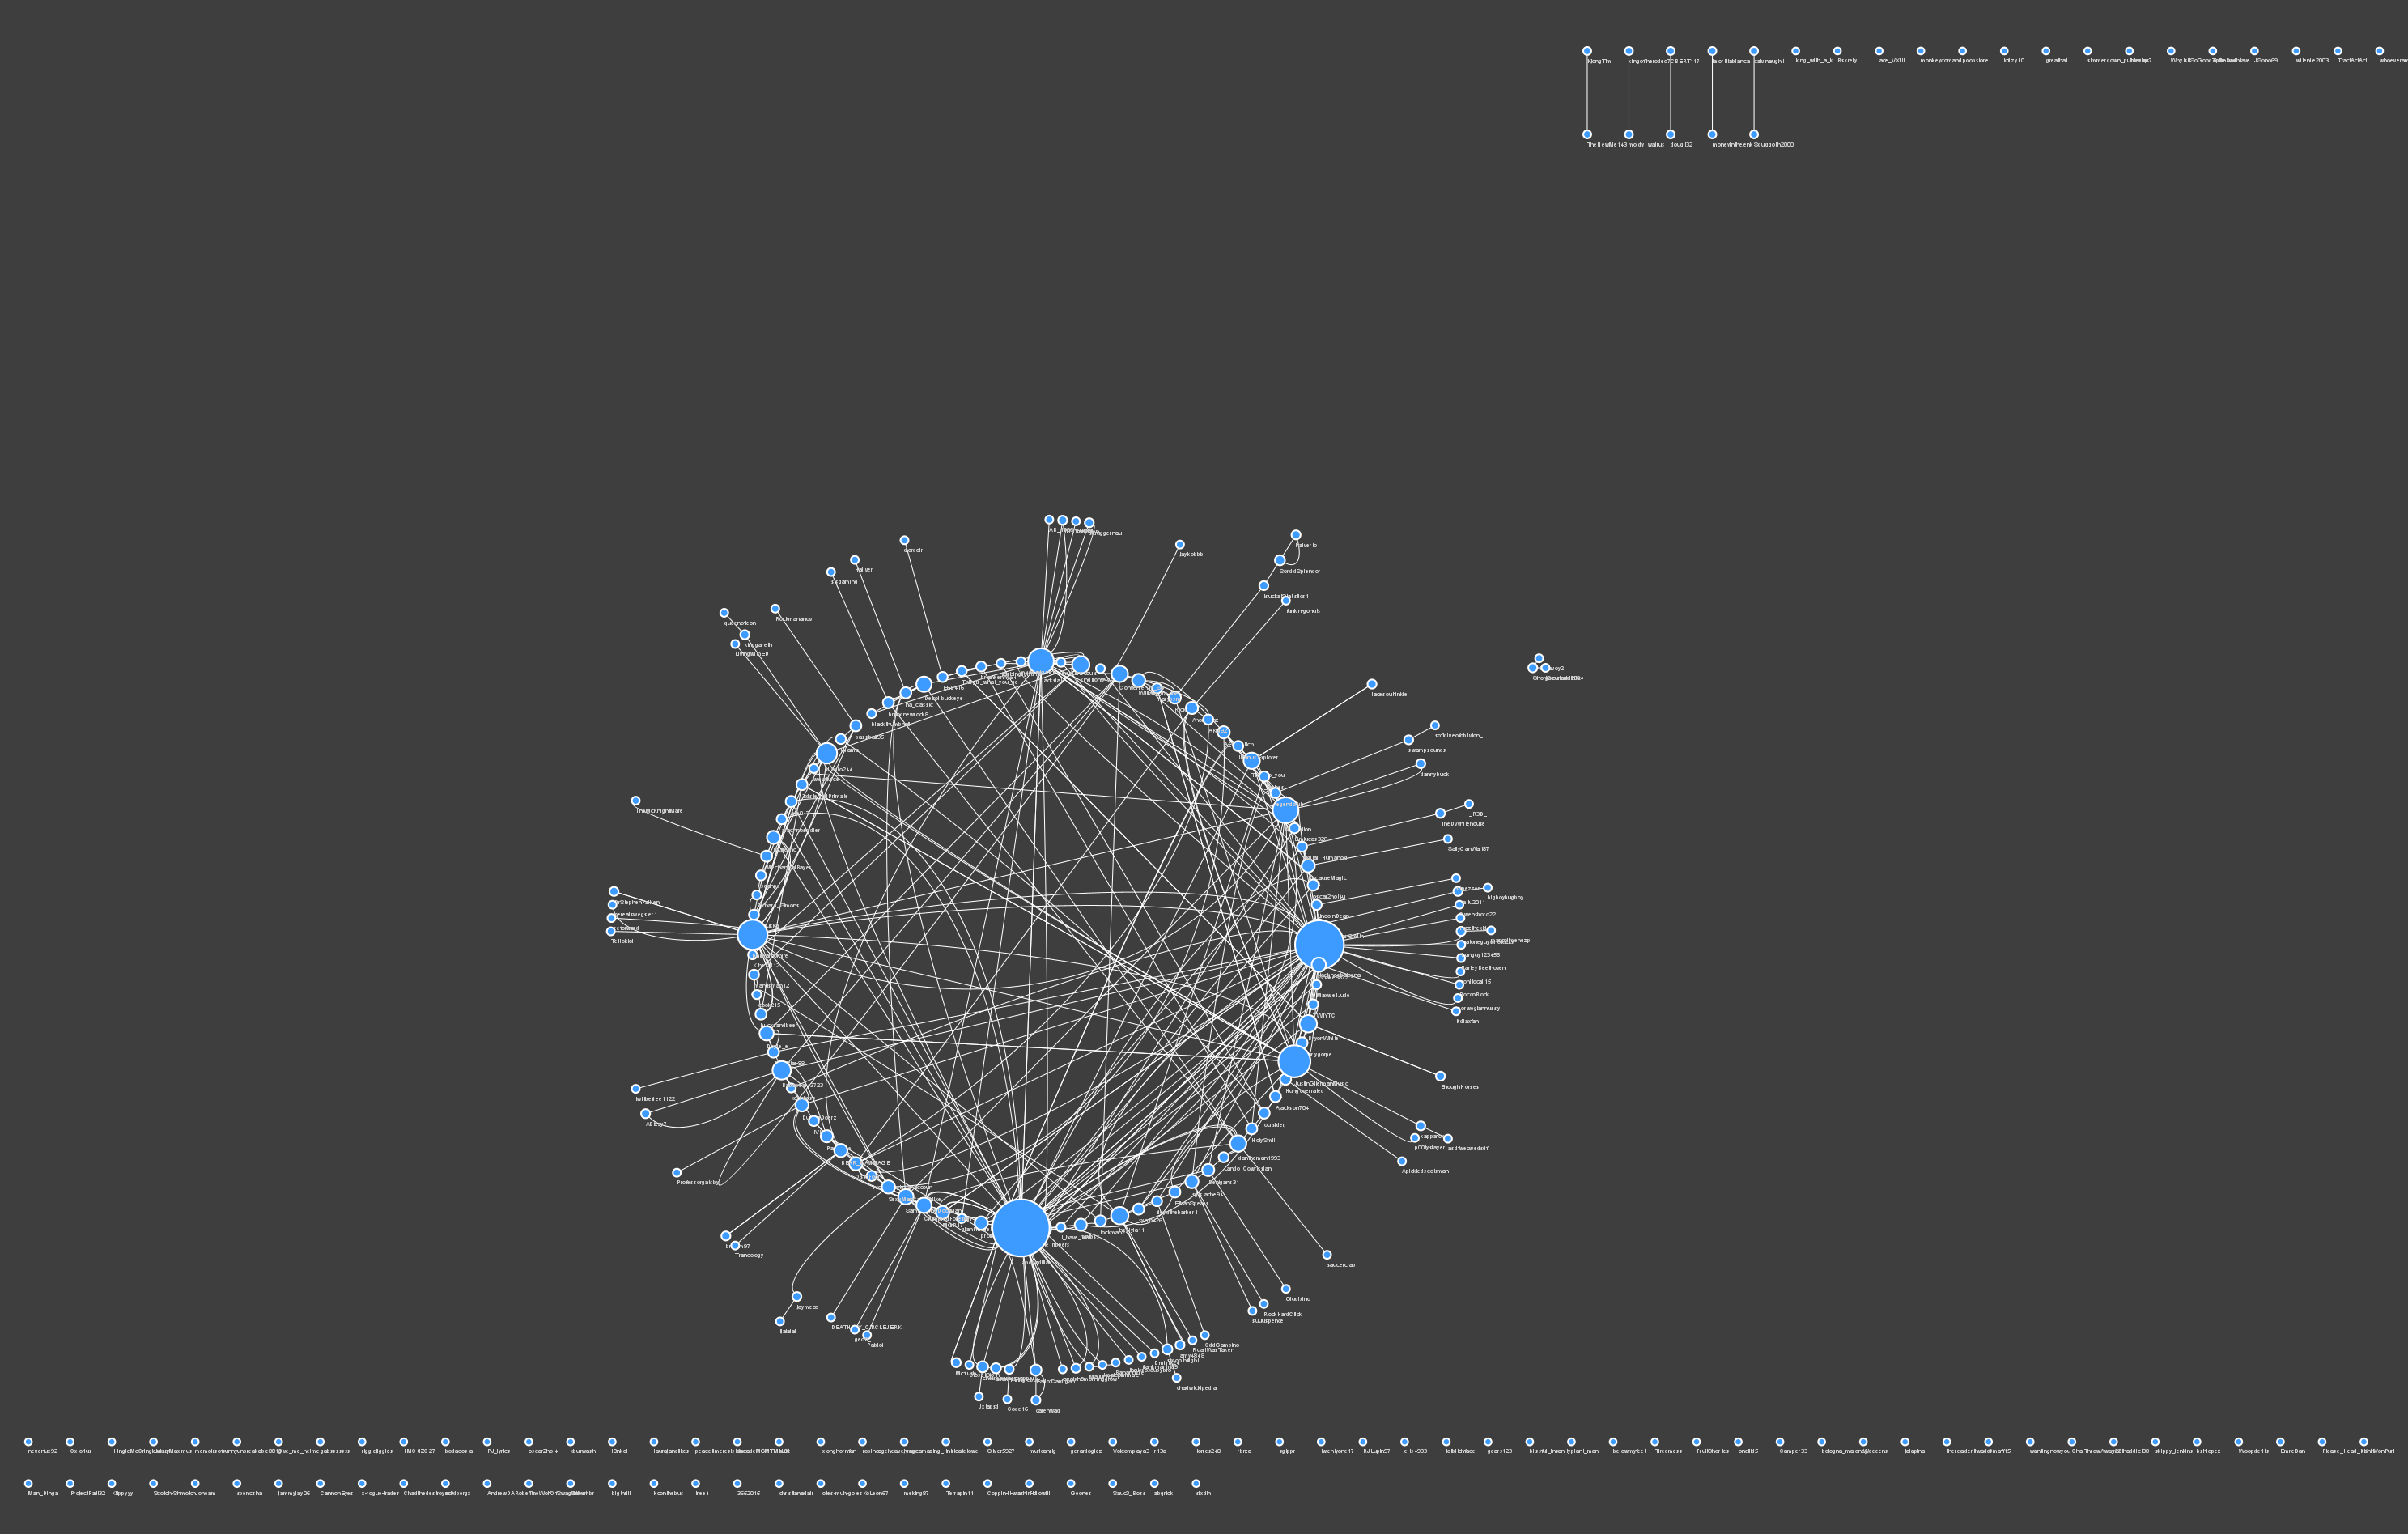

Use Gephi to visualize the network, where each vertex size is correlates to its degree:

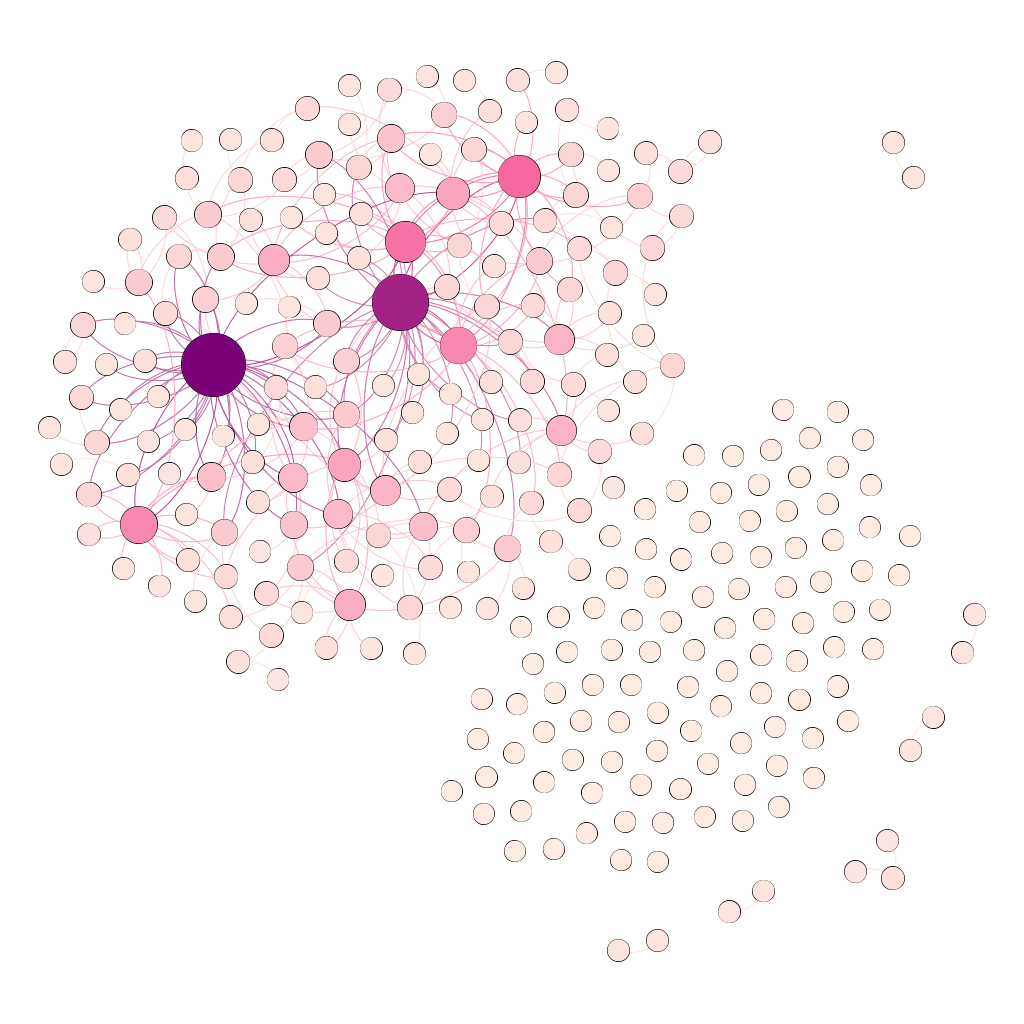

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

In [ ]:
def subgraph(graph, vertex):
  nodes = []
  nodes.append(vertex)
  for edge in ng.edges:
    if edge[0] == vertex:
      nodes.append(edge[1])
    elif edge[1] == vertex:
      nodes.append(edge[0])
  sub_graph = nx.subgraph(graph, nodes)
  return sub_graph

Networkx: DiGraph with 33 nodes and 56 edges


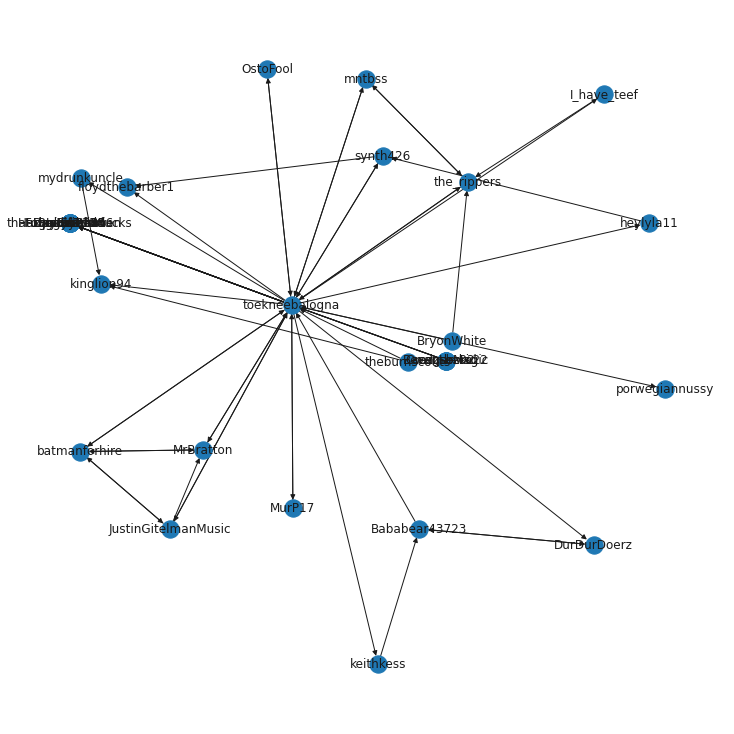

In [ ]:
h = subgraph(ng, 'toekneebalogna')
print("Networkx: %s" % nx.info(h))
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(h,with_labels=True)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/the_free_internet_chess_server
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/the_free_internet_chess_server/fcis.tar.gz
!tar -xf ./datasets/the_free_internet_chess_server/fcis.tar.gz -C ./datasets/the_free_internet_chess_server/
!ls ./datasets/the_free_internet_chess_server/

mkdir: cannot create directory ‘./datasets/the_free_internet_chess_server’: File exists
--2022-04-25 16:51:54--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/the_free_internet_chess_server/fcis.tar.gz’

./datasets/the_free 100%[===================>]   6.38G  34.3MB/s    in 2m 43s  

2022-04-25 16:54:38 (40.0 MB/s) - ‘./datasets/the_free_internet_chess_server/fcis.tar.gz’ saved [6852261483/6852261483]

FCIS  fcis.tar.gz


In [ ]:
v_sf = tc.load_sframe("./datasets/the_free_internet_chess_server/FCIS/fcis_chess.vertices.sframe/m_c12c4e80284628ce.frame_idx")
v_sf

mindate,v_id,maxdate
1999-01-01 03:13:00,ranger,2014-07-29 01:30:00
1999-01-01 03:13:00,game,1999-12-30 23:58:00
1999-01-01 12:51:00,abpdoc,2013-11-05 02:53:00
1999-01-01 12:51:00,jovanka,2005-05-13 19:50:00
1999-01-02 07:15:00,HugoPrat,2001-06-25 08:18:00
1999-01-02 07:15:00,Pepo,2014-12-22 17:15:00
1999-01-02 20:45:00,Alby,2015-12-18 19:08:00
1999-01-02 20:45:00,Zaza,2003-11-05 06:40:00
1999-01-03 08:46:00,chirpy,2015-07-05 02:35:00
1999-01-03 08:46:00,varg,2014-06-13 22:20:00


In [ ]:
l_sf = tc.load_sframe("./datasets/the_free_internet_chess_server/FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.frame_idx")
l_sf

datetime,src_id,dst_id
1999-01-01 03:13:00,ranger,game
1999-01-01 03:13:00,game,ranger
1999-01-01 12:51:00,jovanka,abpdoc
1999-01-01 12:51:00,abpdoc,jovanka
1999-01-02 07:15:00,Pepo,HugoPrat
1999-01-02 07:15:00,HugoPrat,Pepo
1999-01-02 20:45:00,Alby,Zaza
1999-01-02 20:45:00,Zaza,Alby
1999-01-03 08:46:00,varg,chirpy
1999-01-03 08:46:00,chirpy,varg


In [ ]:
l_sf = l_sf.head(1000000)
l_sf

datetime,src_id,dst_id
1999-01-01 03:13:00,ranger,game
1999-01-01 03:13:00,game,ranger
1999-01-01 12:51:00,jovanka,abpdoc
1999-01-01 12:51:00,abpdoc,jovanka
1999-01-02 07:15:00,Pepo,HugoPrat
1999-01-02 07:15:00,HugoPrat,Pepo
1999-01-02 20:45:00,Alby,Zaza
1999-01-02 20:45:00,Zaza,Alby
1999-01-03 08:46:00,varg,chirpy
1999-01-03 08:46:00,chirpy,varg


In [ ]:
sg = tc.SGraph(vertices=v_sf, edges=l_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")
sg.summary()

{'num_edges': 1000000, 'num_vertices': 519583}

In [ ]:
ng = sgraph2nxgraph(sg)
print("Networkx: %s" % nx.info(ng))

Networkx: DiGraph with 519583 nodes and 401669 edges


In [ ]:
import operator

#According to Closeness Centrality who is the most central:
d = nx.closeness_centrality(ng) # can take some time to run

max(dict(d).items(), key=operator.itemgetter(1))

('Ludvig', 0.009161875617570253)

In [ ]:
# The top-10 most centeral players at The Free Internet Chess Sever
sorted_d = sorted(d, key=d.get, reverse=True)[:10]

print("The top-10 most centeral players at The Free Internet Chess Sever:")
print(sorted_d)

The top-10 most centeral players at The Free Internet Chess Sever:
['Ludvig', 'mscp', 'pkch', 'BRoberman', 'Wronskian', 'Jopin', 'JosephStorm', 'MojoMan', 'RookBook', 'indyjones']


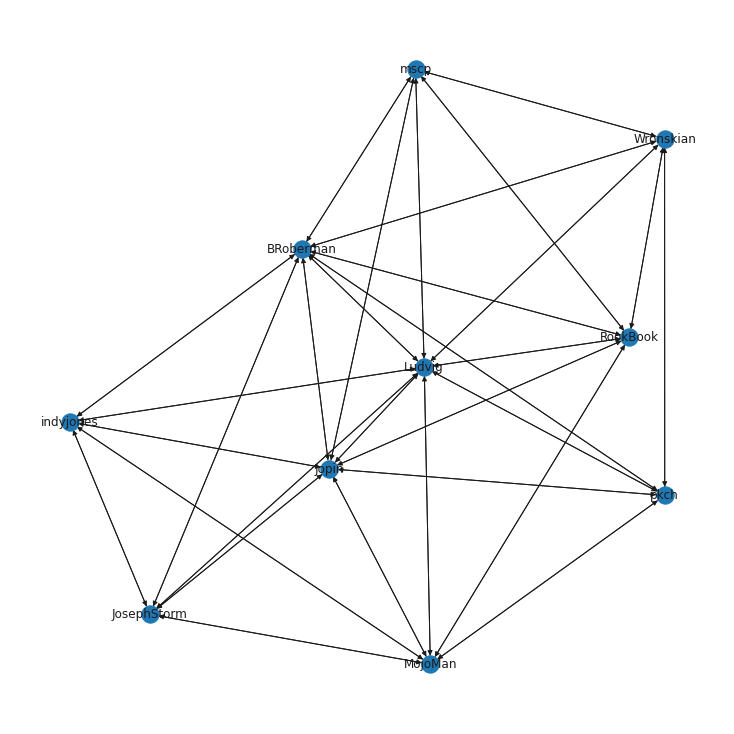

In [ ]:
# Visualize part of the network

h = ng.subgraph(sorted_d)
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(h, with_labels=True)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/

import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"shaharshcheranski","key":"c990a441aa3af5f11e0a45bcce8035fb"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Creating a dataset directory
!cd /content
!mkdir ./datasets/ltor
!cd ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 36.8MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [ ]:
import re
import numpy as np
import pandas as pd
import networkx as nx

df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

,birth,death,gender,hair,height,name,race,realm,spouse
0,,,Female,,,Adanel,Men,,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),,Boromir,Men,,
2,,"March ,3019",Male,,,Lagduf,Orcs,,
3,TA 280,TA 515,Male,,,Tarcil,Men,Arnor,Unnamed wife
4,,,Male,,,Fire-drake of Gondolin,Dragon,,
...,...,...,...,...,...,...,...,...,...
906,"Mid ,First Age",FA 495,Female,,,Aerin,Men,,Brodda
907,,,,,,Aerandir,,,
908,"YT during the ,Noontide of Valinor",FA 455,Male,Golden,,Aegnor,Elves,,"Loved ,Andreth but remained unmarried"
909,TA 2917,TA 3010,Male,,,Adrahil II,Men,,Unnamed wife


In [ ]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s

    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))

links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df

,name,norm_spouse,race,gender
0,Adanel,Belemir,Men,Female
7,Angrod,Eldalótë,Elves,Male
10,Ar-Pharazôn,Tar-Míriel,Men,Male
12,Ar-Gimilzôr,Inzilbêth,Men,Male
21,Tarannon Falastur,Berúthiel,Men,Male
...,...,...,...,...
897,Ailinel,Orchaldor,Men,Female
898,Almarian,Tar-Meneldur,Men,Female
899,Algund,None known,Men,Male
906,Aerin,Brodda,Men,Female


In [ ]:
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2

,name_x,norm_spouse_x,race_x,gender_x,name_y,norm_spouse_y,race_y,gender_y
0,Adanel,Belemir,Men,Female,Belemir,Adanel,Men,Male
1,Angrod,Eldalótë,Elves,Male,Eldalótë,Angrod,Elves,Female
2,Ar-Pharazôn,Tar-Míriel,Men,Male,Tar-Míriel,Ar-Pharazôn,Men,Female
3,Ar-Gimilzôr,Inzilbêth,Men,Male,Inzilbêth,Ar-Gimilzôr,Men,Female
4,Tarannon Falastur,Berúthiel,Men,Male,Berúthiel,Tarannon Falastur,Men,Female
...,...,...,...,...,...,...,...,...
122,Amroth,Nimrodel,Elves,Male,Nimrodel,Amroth,Elves,Female
123,Amarië,Finrod,Elves,Female,Finrod,Amarië,Elves,Male
124,Ailinel,Orchaldor,Men,Female,Orchaldor,Ailinel,Men,Male
125,Almarian,Tar-Meneldur,Men,Female,Tar-Meneldur,Almarian,Men,Male


In [ ]:
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)

In [ ]:
nx.write_gml(g, "./datasets/ltor/ltor_graph.gml")

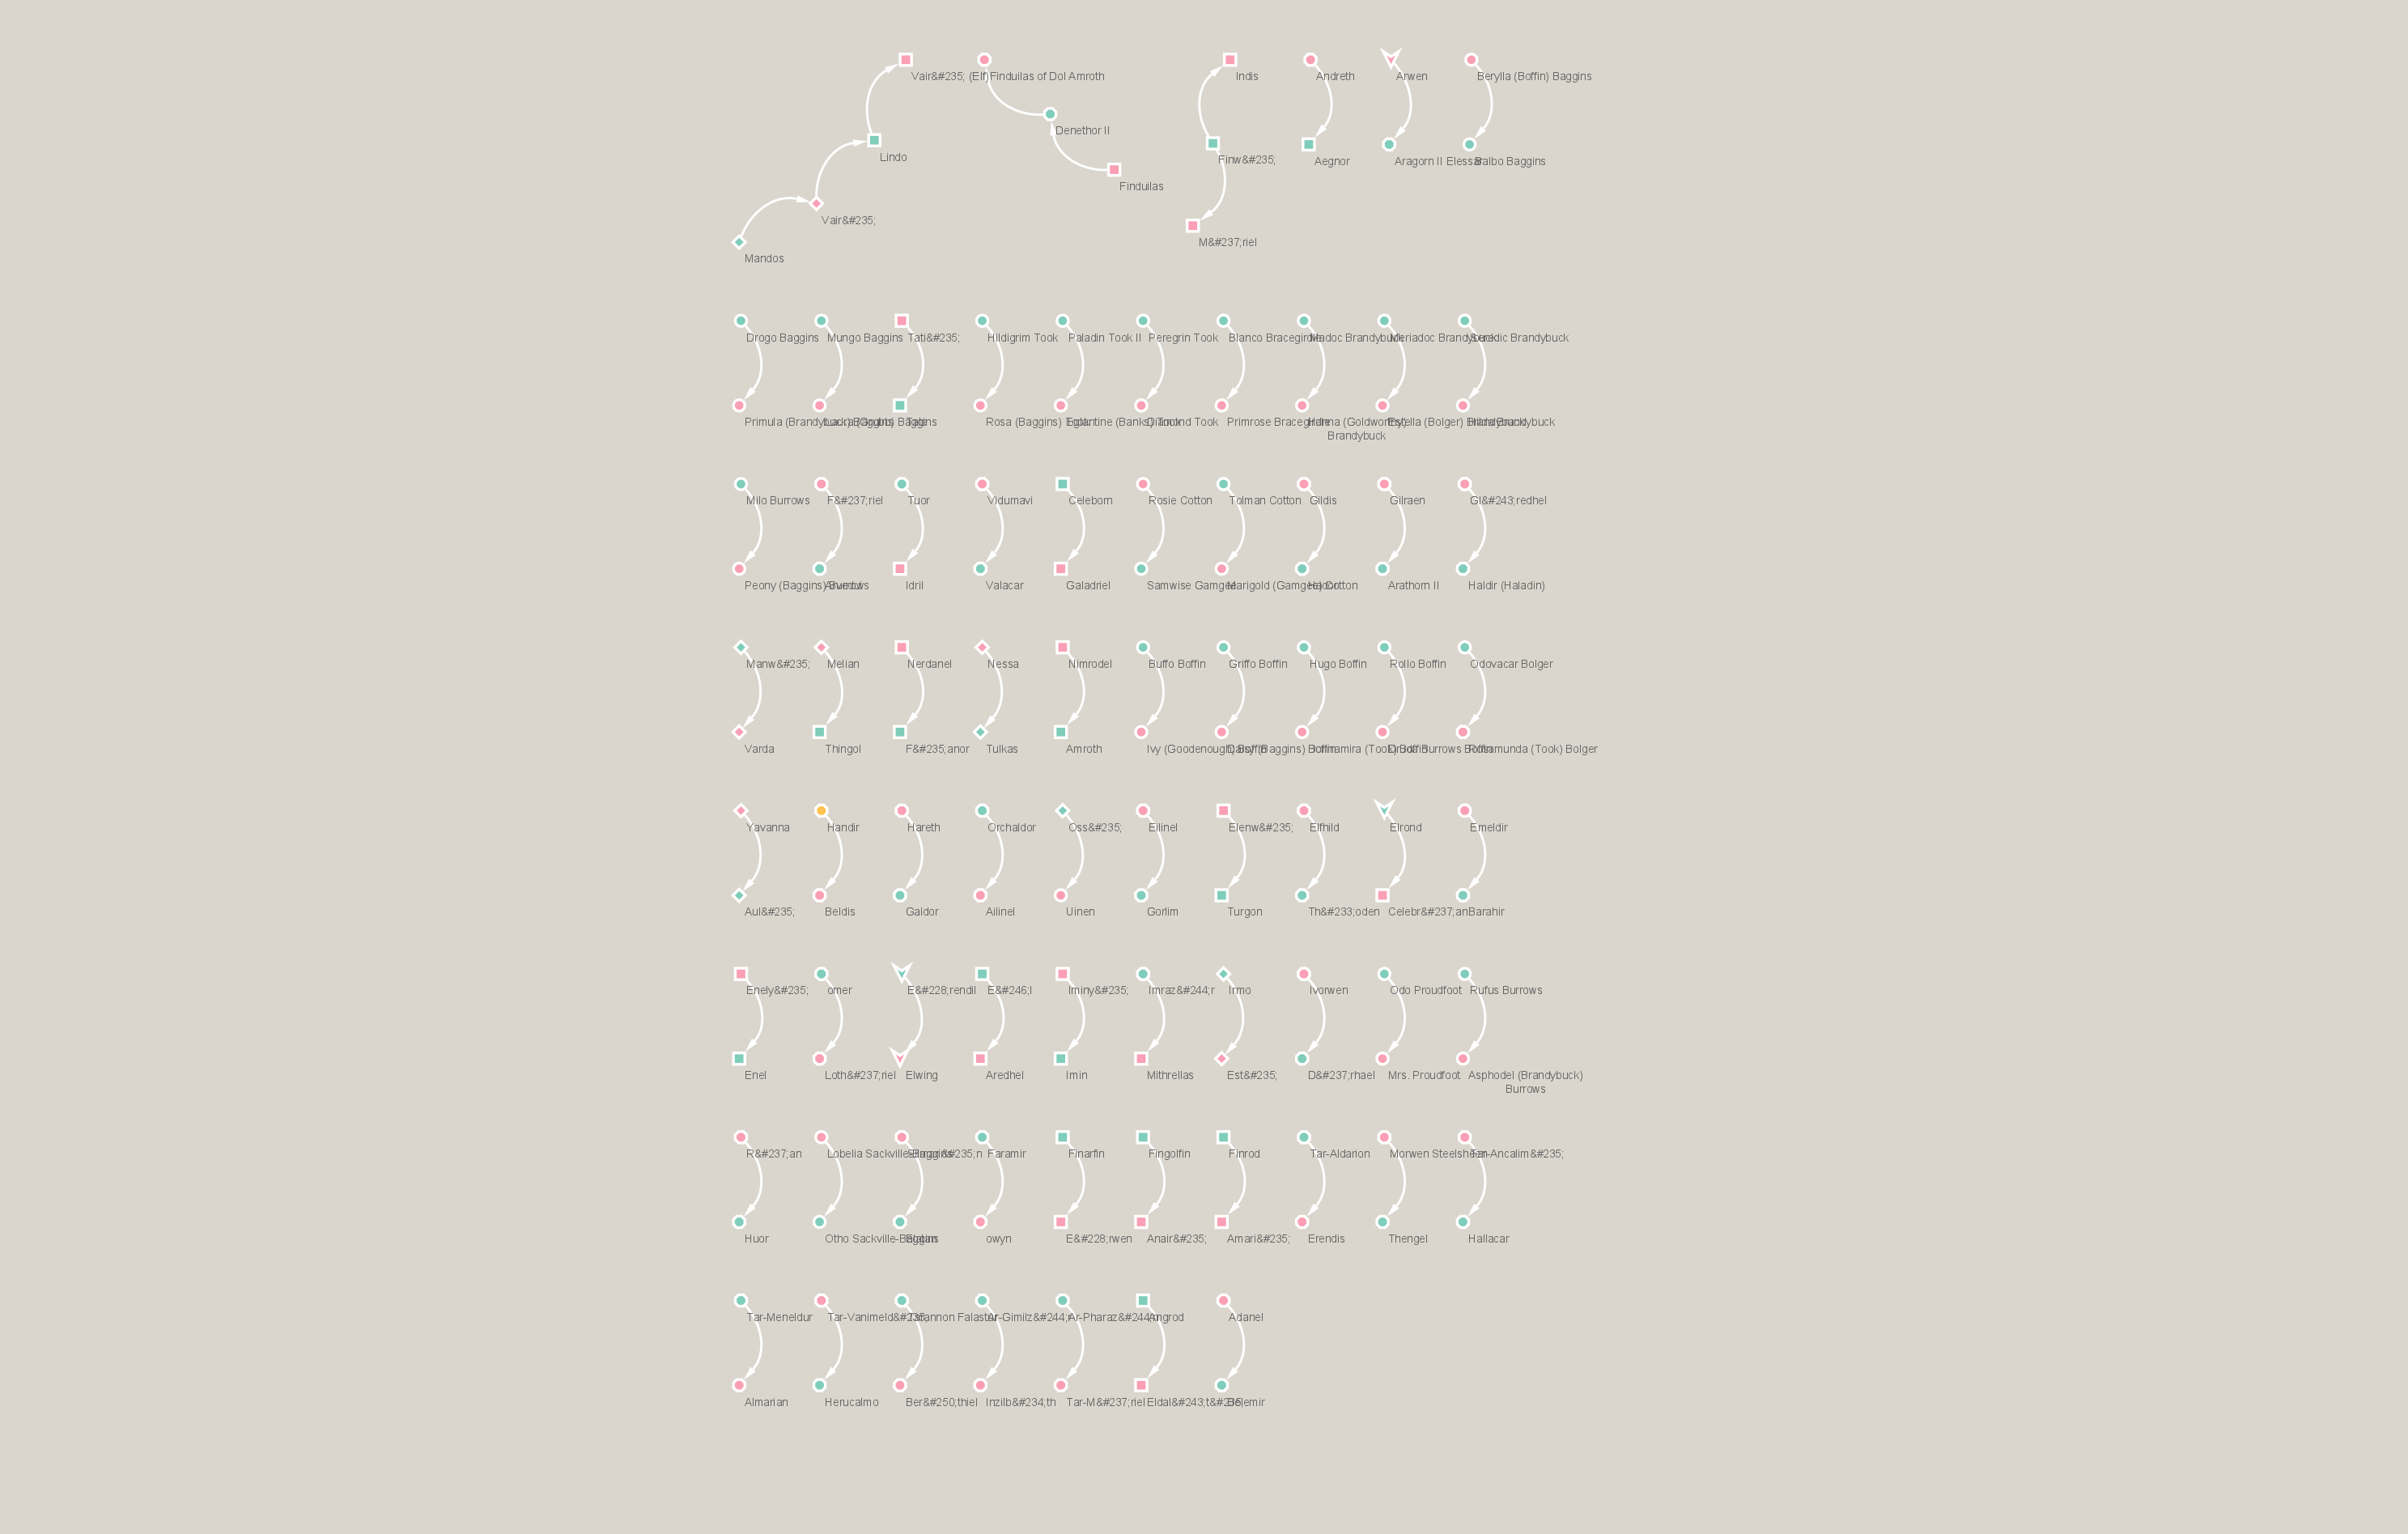

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges